<a href="https://colab.research.google.com/github/ThousandAI/pycs4001/blob/main/class05/ds_salaries(%E5%AD%B8%E7%94%9F%E4%BD%9C%E5%93%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 資料來源: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
df = pd.read_csv("ds_salaries.csv")
df = df.drop(["Unnamed: 0"],axis=1)
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [ ]:
# 查看個欄位資料屬性
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### 各個資料科學職位 與 數量

In [ ]:
job_title_count= df['job_title'].value_counts()
print(job_title_count)

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

#### 資料科學職位年薪(美金) Histogram

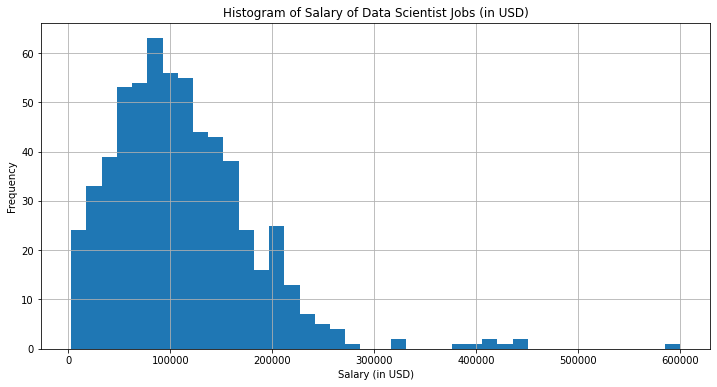

In [ ]:
plt.figure(figsize=(12,6))
df["salary_in_usd"].hist(bins=40)
plt.xlabel("Salary (in USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Salary of Data Scientist Jobs (in USD)")
plt.show()

### 各個資料科學職位平均年薪(美金) - 由高到低

In [ ]:

job_title_salary_mean= df.groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)
print(job_title_salary_mean)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

#### 年薪(美金) 根據四種經驗程度的數據:
- EN: Entry Level, 
- EX: Expert, 
- MI: Junior Mid-Level, 
- SE: Senior-Level

In [ ]:
df.groupby(["experience_level"])["salary_in_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.318182,44395.541126,4000.0,27505.0,56500.0,85425.75,250000.0
EX,26.0,199392.038462,117071.255697,69741.0,130006.5,171437.5,233750.00,600000.0
MI,213.0,87996.056338,63901.057478,2859.0,48000.0,76940.0,112000.00,450000.0
SE,280.0,138617.292857,57691.978337,18907.0,100000.0,135500.0,170000.00,412000.0


#### 年薪 vs. "公司地區"和"經驗等級":

In [ ]:
companyLocation_experienceLevel=df.groupby(["company_location", "experience_level"])["salary_in_usd"].agg([min,max]).head(20)
print(companyLocation_experienceLevel)

                                      min     max
company_location experience_level                
AE               MI                115000  115000
                 SE                 65000  120000
AS               EN                 18053   18053
AT               MI                 61467   74130
                 SE                 91237   91237
AU               EN                 86703  150000
                 MI                 87425   87425
BE               MI                 88654   88654
                 SE                 82744   82744
BR               MI                 12901   12901
                 SE                 18907   24000
CA               EN                 52000   67000
                 EX                118187  196979
                 MI                 54238  187442
                 SE                 61300  225000
CH               EN                  5882    5882
                 MI                122346  122346
CL               MI                 40038   40038


#### 美國 - 資料科學 年薪數據(不分工作經驗等級)

In [ ]:
# experience_level, salary in US
# 在美國 各個經驗等級 的薪資分布
# df.groupby(["company_location"]).company_location.count()
US_company = df.groupby(["company_location"]).get_group("US")
US_company.salary_in_usd.agg([max,min,"mean"])


max     600000.000000
min       5679.000000
mean    144055.261972
Name: salary_in_usd, dtype: float64

In [ ]:
# what is the job title with lowest salary in US
lowest_salary_index=US_company.salary_in_usd.idxmin()
df["job_title"][lowest_salary_index]

'Data Scientist'

#### 美國 - 資料科學 依經驗等級 年資數據 (不分職稱)

In [ ]:
# US_salary["salary_in_usd"]
US_salary_data=US_company.groupby(["experience_level"])["salary_in_usd"].agg([len,min,max, "mean"])
US_salary_data

,len,min,max,mean
experience_level,,,,
EN,31,12000,250000,93112.903226
EX,16,110000,600000,243742.187500
MI,90,5679,450000,125780.211111
SE,218,25000,412000,151527.633028


#### Histogram

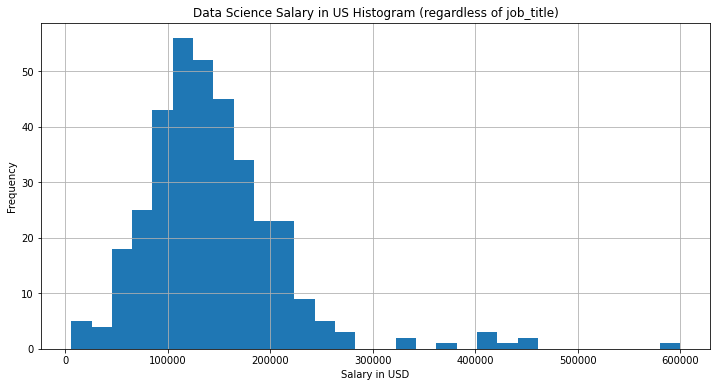

In [ ]:
plt.figure(figsize=(12,6))
US_company.salary_in_usd.hist(bins=30)
plt.title("Data Science Salary in US Histogram (regardless of job_title)")
plt.xlabel("Salary in USD")
plt.ylabel('Frequency')
plt.show()

#### Data Scientist in companies located in US based on experience levels:

In [ ]:
# Data Scientist in US based on experience level , what are the salaries like ?
# job_title == Data Scientist
# company_location == US -> US_company

US_DataScientist=US_company.loc[df.job_title =='Data Scientist']
US_DataScientist_experience = US_DataScientist.groupby("experience_level")
US_DataScientist_experience.salary_in_usd.describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,6.0,88833.333333,17554.676490,58000.0,82500.0,95000.0,100000.0,105000.0
MI,25.0,112547.560000,41979.890817,5679.0,90000.0,118000.0,138350.0,200000.0
SE,53.0,163679.773585,54659.135154,68428.0,136620.0,150000.0,205300.0,412000.0


#### Histogram

Text(0, 0.5, '$Frequency$')

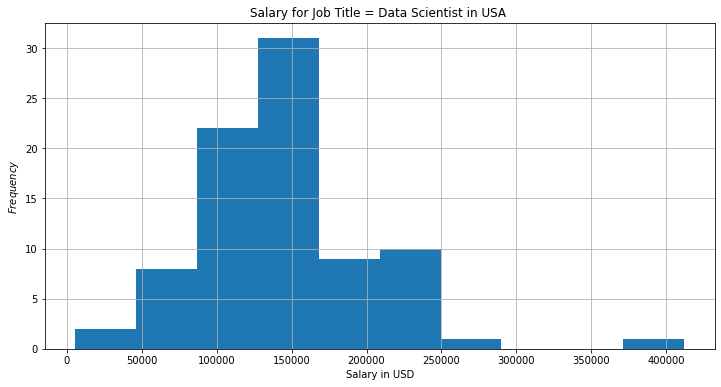

In [ ]:
# Data Scientist salary histogram
plt.figure(figsize=(12,6))
US_DataScientist.salary_in_usd.hist(bins=10)
plt.title("Salary for Job Title = Data Scientist in USA ")
plt.xlabel("Salary in USD")
plt.ylabel("$Frequency$")

# 以下是自我練習...

In [ ]:
df.loc[:,['experience_level','job_title','salary_in_usd','company_location']]

,experience_level,job_title,salary_in_usd,company_location
0,MI,Data Scientist,79833,DE
1,SE,Machine Learning Scientist,260000,JP
2,SE,Big Data Engineer,109024,GB
3,MI,Product Data Analyst,20000,HN
4,SE,Machine Learning Engineer,150000,US
...,...,...,...,...
602,SE,Data Engineer,154000,US
603,SE,Data Engineer,126000,US
604,SE,Data Analyst,129000,US
605,SE,Data Analyst,150000,US


In [ ]:
# df.set_index("experience_level")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
df["company_location"] == "US"

0      False
1      False
2      False
3      False
4       True
       ...  
602     True
603     True
604     True
605     True
606     True
Name: company_location, Length: 607, dtype: bool

In [ ]:
df.loc[df["company_location"] == "US"]
# same as 
# df[df["company_location"] == "US"]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
A = df["company_location"] == "US"
B = df.salary_in_usd >= df.salary_in_usd.mean()

df.loc[(A)&(B)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
# Select data only with SE or Ex as experience_level
df.loc[df.experience_level.isin(['SE','EX'])]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S
...,...,...,...,...,...,...,...,...,...,...,...
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [ ]:
# Select entries from US located companies and 
US_company = df.loc[df["company_location"] == 'US']
US_company

# Find the salary mean in US
US_mean_salary = US_company.salary_in_usd.mean()
US_mean_salary

# compare US_mean_salary with overall salary_mean
Overall_mean_salary = df["salary_in_usd"].mean()

print(f'US_mean_salary: {US_mean_salary:16.4f}\nOverall_mean_salary: {Overall_mean_salary:11.4f}')

# Select the ppl in US whose salary is higher than US mean
US_higher_than_mean_salary = US_company.loc[US_company["salary_in_usd"] >= US_mean_salary]
US_higher_than_mean_salary

US_mean_salary:      144055.2620
Overall_mean_salary: 112297.8699


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
37,2020,EN,FT,Machine Learning Engineer,250000,USD,250000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
x1 = len(US_higher_than_mean_salary) # number of rows in a pd df
x2 = len(US_company)

# What percentage of workers have salary higher than its mean in US ?
ratio = x1/x2 * 100
print('Ratio is: %20.2f' % ratio)

Ratio is:                42.82


In [ ]:
# unique values - job_title, experience_level,
df.job_title.value_counts() #Series
df.experience_level.value_counts() #Series
df.employment_type.value_counts() #Series
df.company_location.value_counts() #Series

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [ ]:
# salary_mean
salary_in_usd_mean = df["salary_in_usd"].mean()
salary_in_usd_mean = df.salary_in_usd.mean()

# re-mean the salary_in_usd  
re_mean = df["salary_in_usd"].map(lambda x: x - salary_in_usd_mean) #Series
print(re_mean)

0      -32464.869852
1      147702.130148
2       -3273.869852
3      -92297.869852
4       37702.130148
           ...      
602     41702.130148
603     13702.130148
604     16702.130148
605     37702.130148
606     87702.130148
Name: salary_in_usd, Length: 607, dtype: float64


In [ ]:
def remean_salaryInUSD(df):
    df.salary_in_usd -= salary_in_usd_mean
    return df

US_company.apply(remean_salaryInUSD,axis='columns')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2020,SE,FT,Machine Learning Engineer,150000,USD,37702.130148,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,-40297.869852,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,77702.130148,US,100,US,S
8,2020,MI,FT,Business Data Analyst,135000,USD,22702.130148,US,100,US,L
13,2020,MI,FT,Lead Data Analyst,87000,USD,-25297.869852,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,41702.130148,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,13702.130148,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,16702.130148,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,37702.130148,US,100,US,M


In [ ]:
salary_mean = df["salary_in_usd"].mean()
re_mean = df["salary_in_usd"] - salary_mean 
type(re_mean) #Series

pandas.core.series.Series

In [ ]:
x3 = df["experience_level"] + '-' + df["employment_type"]
type(x3) #Series

pandas.core.series.Series